In [11]:
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

# Custom imports
import wrangle

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [10]:
# Wrangle function
df = wrangle.wrangle_zillow()
df.head(5)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [12]:
# Splitting
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [13]:
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

In [14]:
train_scaled = train.copy() # This creates a NEW COPY
scaler = MinMaxScaler()
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [15]:
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
410426,0.500000,0.333333,0.002916,0.178516,1961,4418.72,6037
533217,0.500000,0.583333,0.003387,0.143884,1996,2798.18,6059
695362,0.500000,0.333333,0.002901,0.294375,1923,7210.51,6037
729442,0.500000,0.166667,0.002122,0.145489,1952,3622.02,6037
524897,0.000000,0.166667,0.000744,0.017260,1942,579.61,6037
...,...,...,...,...,...,...,...
81672,0.500000,0.416667,0.004630,0.231666,1966,5183.18,6059
806068,0.333333,0.250000,0.002241,0.258892,1987,5353.78,6059
703366,0.500000,0.333333,0.003302,0.239030,1944,5785.01,6037
798811,0.500000,0.166667,0.002235,0.036479,1947,482.63,6037


In [17]:
train                  # Same thing, just an additional copy to mess with

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
410426,3,2.0,1550,357034,1961,4418.72,6037
533217,3,3.5,1800,287774,1996,2798.18,6059
695362,3,2.0,1542,588738,1923,7210.51,6037
729442,3,1.0,1128,290984,1952,3622.02,6037
524897,0,1.0,396,34541,1942,579.61,6037
...,...,...,...,...,...,...,...
81672,3,2.5,2460,463327,1966,5183.18,6059
806068,2,1.5,1191,517777,1987,5353.78,6059
703366,3,2.0,1755,478054,1944,5785.01,6037
798811,3,1.0,1188,72975,1947,482.63,6037


Text(0, 0.5, 'Count')

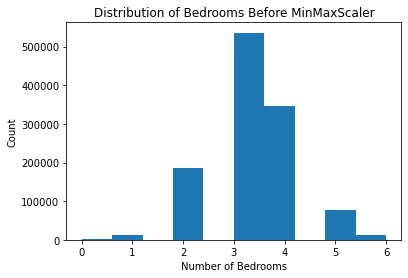

In [18]:
plt.hist(train.bedroomcnt)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

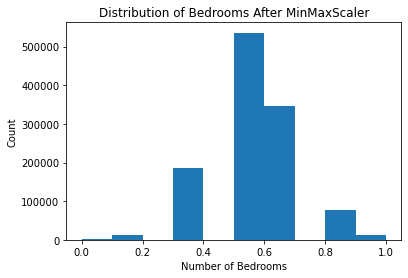

In [19]:
plt.hist(train_scaled.bedroomcnt)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [20]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

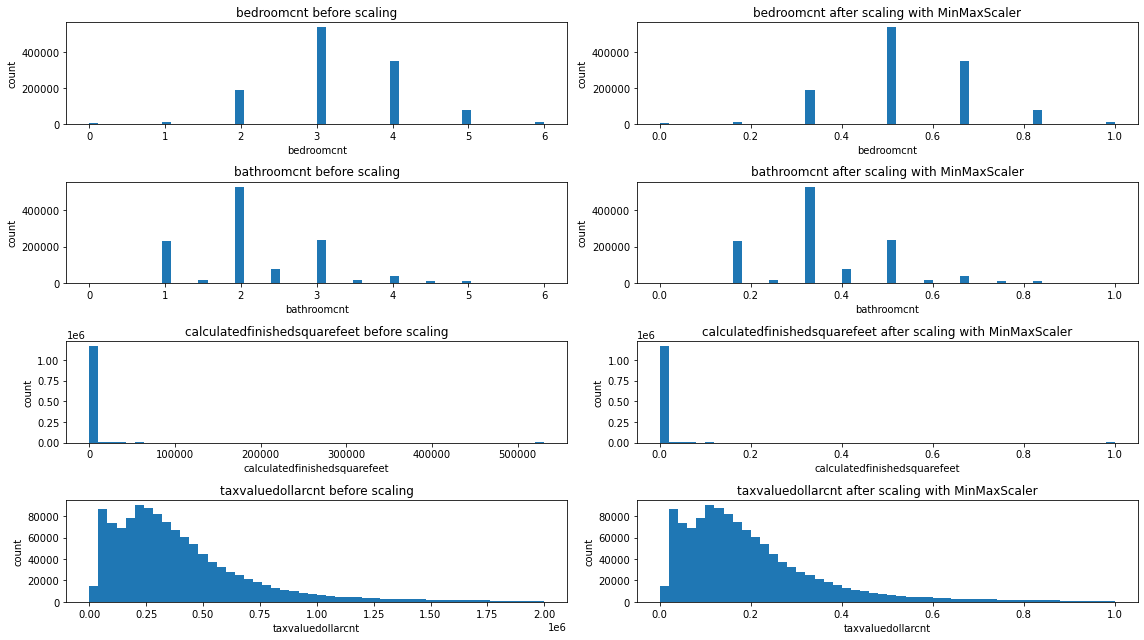

In [21]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

#### Takeaway: 

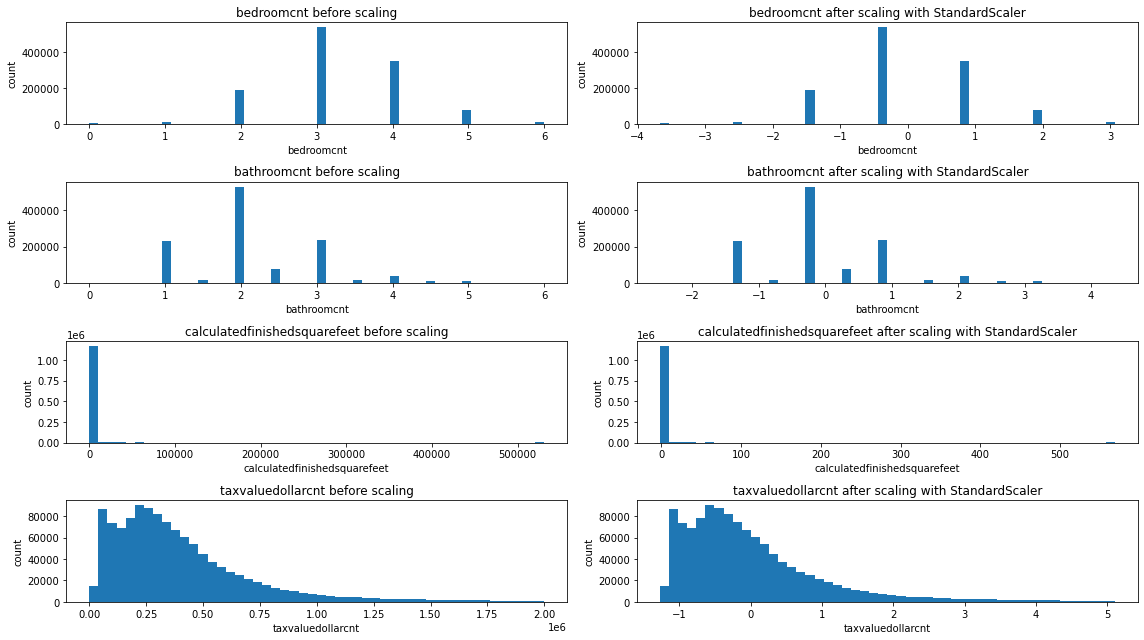

In [22]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

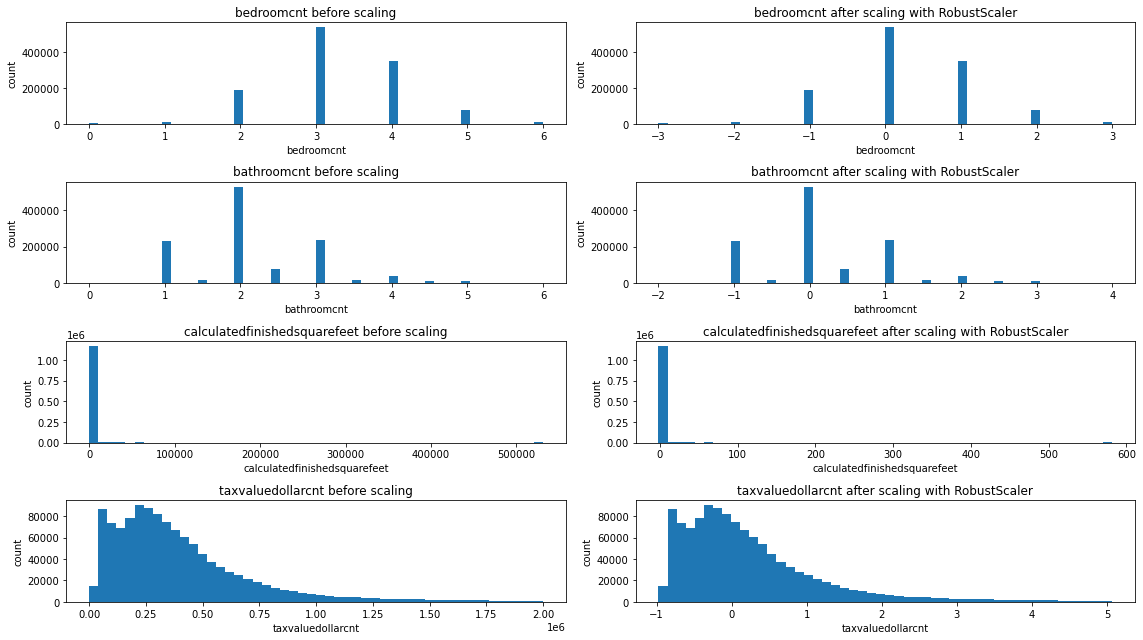

In [23]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

#### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [24]:
scaler = MinMaxScaler()
original_data = train[['taxvaluedollarcnt']]
scaled_data = scaler.fit_transform(original_data)

In [25]:
scaled_data[:5]

array([[0.17851618],
       [0.1438842 ],
       [0.29437478],
       [0.14548929],
       [0.01726048]])

In [26]:
original_data[:5]

,taxvaluedollarcnt
410426,357034
533217,287774
695362,588738
729442,290984
524897,34541


In [27]:
scaler.inverse_transform(scaled_data)[:5]

array([[357034.],
       [287774.],
       [588738.],
       [290984.],
       [ 34541.]])

In [28]:
(scaler.inverse_transform(scaled_data) == original_data)

,taxvaluedollarcnt
410426,True
533217,True
695362,True
729442,True
524897,True
...,...
81672,True
806068,False
703366,True
798811,True


#### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

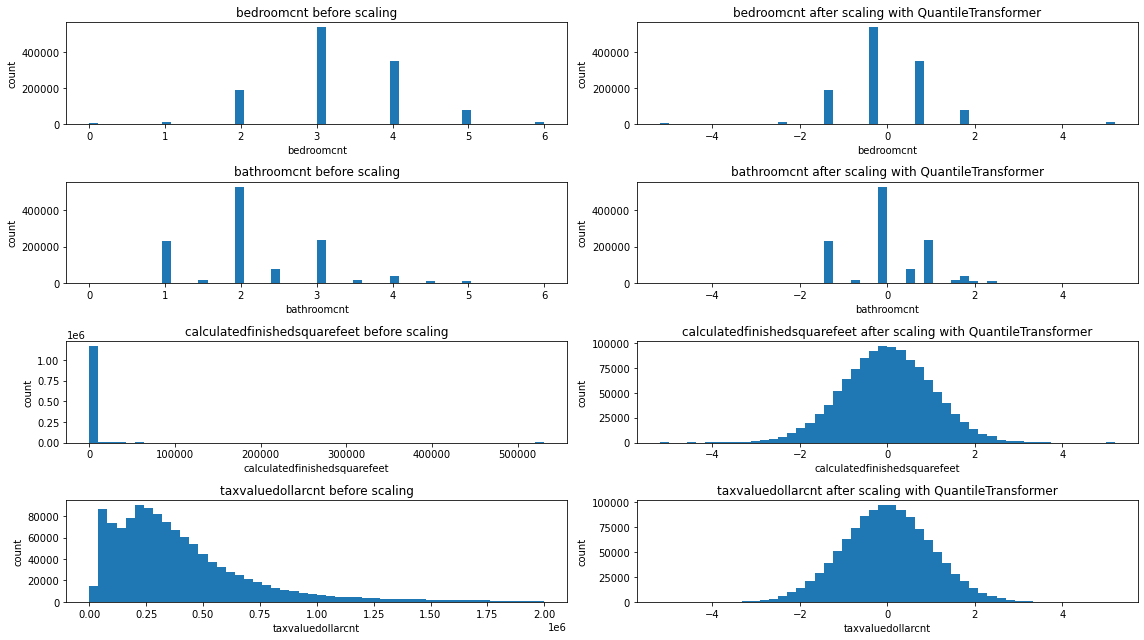

In [29]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=columns_to_scale, bins=50)

#### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

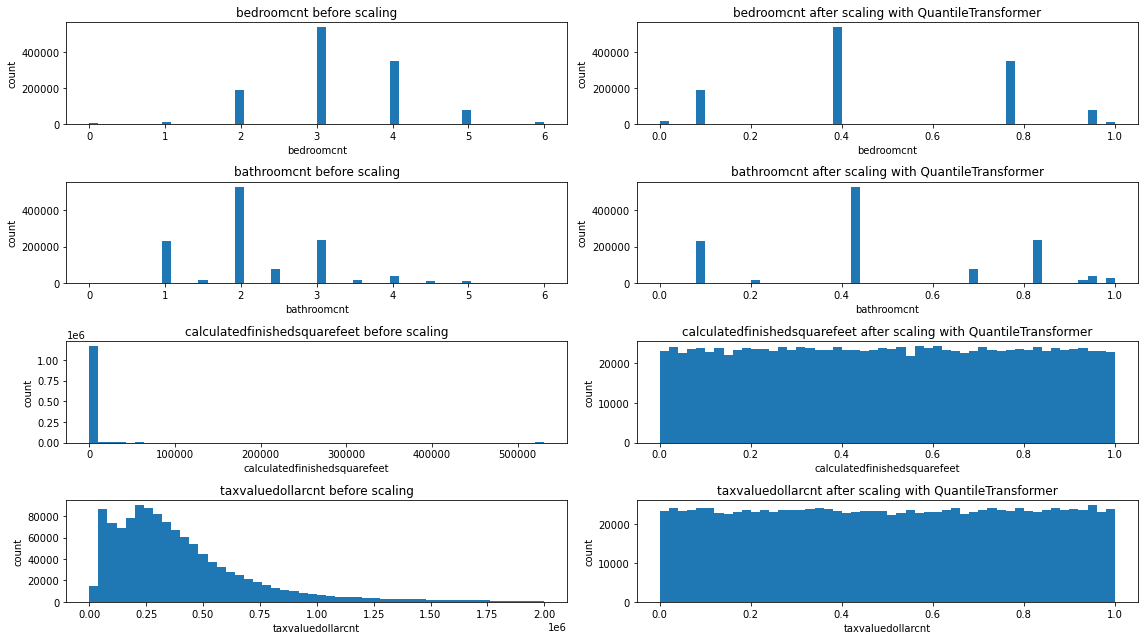

In [30]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=columns_to_scale, bins=50)

#### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [31]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [32]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [33]:
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
410426,0.500000,0.333333,0.002916,0.178516,1961,4418.72,6037
533217,0.500000,0.583333,0.003387,0.143884,1996,2798.18,6059
695362,0.500000,0.333333,0.002901,0.294375,1923,7210.51,6037
729442,0.500000,0.166667,0.002122,0.145489,1952,3622.02,6037
524897,0.000000,0.166667,0.000744,0.017260,1942,579.61,6037
...,...,...,...,...,...,...,...
81672,0.500000,0.416667,0.004630,0.231666,1966,5183.18,6059
806068,0.333333,0.250000,0.002241,0.258892,1987,5353.78,6059
703366,0.500000,0.333333,0.003302,0.239030,1944,5785.01,6037
798811,0.500000,0.166667,0.002235,0.036479,1947,482.63,6037


In [34]:
validate_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
551319,0.333333,0.166667,0.001964,0.093066,1930,2467.64,6037
1875090,0.500000,0.166667,0.001896,0.019093,1944,493.90,6111
1010924,0.666667,0.333333,0.002962,0.244760,1972,5658.43,6037
32767,0.333333,0.166667,0.002030,0.144106,1938,3169.20,6037
58058,0.666667,0.333333,0.002965,0.115594,1960,3336.08,6037
...,...,...,...,...,...,...,...
430446,0.833333,0.833333,0.007720,0.444343,1996,10913.11,6037
1952468,0.500000,0.500000,0.002216,0.090603,1992,2727.53,6037
82166,0.833333,0.583333,0.007706,0.417398,1990,9757.72,6059
864959,0.500000,0.333333,0.002583,0.173106,1927,4172.49,6037


In [35]:
test_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
655262,0.500000,0.166667,0.001945,0.157688,1951,4383.54,6037
1679457,0.333333,0.166667,0.001489,0.043149,1904,1100.03,6037
1660246,0.333333,0.166667,0.001753,0.033358,1948,1048.79,6037
572120,0.666667,0.333333,0.004988,0.044287,1920,1518.98,6037
989706,0.500000,0.166667,0.002952,0.036075,1925,1433.94,6037
...,...,...,...,...,...,...,...
1497062,0.666667,0.416667,0.003800,0.261560,1977,5466.08,6059
343227,0.500000,0.333333,0.002212,0.238735,1963,5403.62,6059
1404796,0.500000,0.333333,0.002542,0.165041,1955,3988.16,6037
389644,0.833333,0.500000,0.004777,0.337508,1965,8219.39,6037
